<div style="text-align: center;"> <h3>Exploratory Data Analysis</h3>
<h5>Formative Assessment 5</h5>
<h5>April 30, 2025</h5>    
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

### Task Overview:
You have a dataset containing the following features:

* Customer ID (Unique Identifier)

* Age (Continuous variable)

* Annual Income (Continuous variable, in thousands of dollars)

* Gender (Categorical: Male/Female)

* Product Category Purchased (Categorical: Electronics, Fashion, Home, Books, Others)

* Average Spend per Visit (Continuous variable, in dollars)

* Number of Visits in Last 6 Months (Discrete variable)

* Customer Segment (Categorical target variable: Budget Shopper, Regular Shopper, Premium Shopper)

The target variable, Customer Segment, has three categories:

* Budget Shopper (Low spenders)

* Regular Shopper (Moderate spenders)

* Premium Shopper (High spenders)

### Step 1: Load and Explore the Data (10 points)
Import the dataset into R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_segmentation.csv")
print(df.shape)
df.head()

(10532, 8)


,Customer ID,Age,Annual Income (K$),Gender,Product Category Purchased,Average Spend per Visit ($),Number of Visits in Last 6 Months,Customer Segment
0,1,56,106,Female,Fashion,163.452764,16,Premium Shopper
1,2,69,66,Female,Home,163.020496,31,Budget Shopper
2,3,46,110,Male,Fashion,104.541284,29,Budget Shopper
3,4,32,50,Male,Electronics,110.064567,26,Regular Shopper
4,5,60,73,Female,Others,142.254559,38,Regular Shopper


Display summary statistics and variable types.

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        10532 non-null  int64  
 1   Age                                10532 non-null  int64  
 2   Annual Income (K$)                 10532 non-null  int64  
 3   Gender                             10532 non-null  object 
 4   Product Category Purchased         10532 non-null  object 
 5   Average Spend per Visit ($)        10532 non-null  float64
 6   Number of Visits in Last 6 Months  10532 non-null  int64  
 7   Customer Segment                   10532 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 658.4+ KB
None


,Customer ID,Age,Annual Income (K$),Average Spend per Visit ($),Number of Visits in Last 6 Months
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,5266.500000,43.593714,89.183726,104.296750,21.922237
std,3040.470852,14.904286,34.410760,54.611394,10.084682
min,1.000000,18.000000,30.000000,10.001052,5.000000
25%,2633.750000,31.000000,59.000000,56.706865,13.000000
50%,5266.500000,43.000000,89.000000,104.686601,22.000000
75%,7899.250000,56.000000,118.000000,150.885536,31.000000
max,10532.000000,69.000000,149.000000,199.959981,39.000000


#### Distribution of sales_count

Text(0.5, 1.0, 'PDF of `sales_count`')

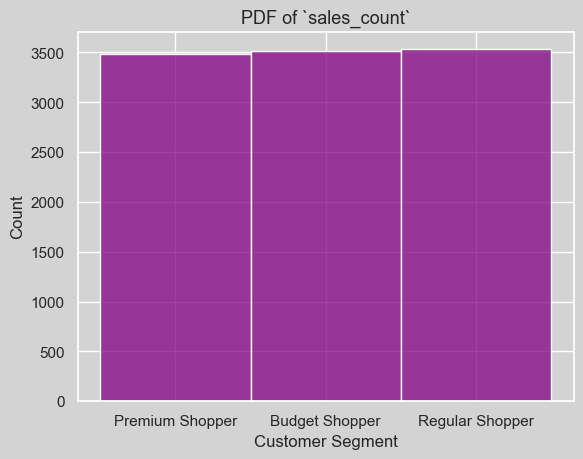

In [5]:
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.rcParams['axes.facecolor'] = 'lightgrey'

sns.histplot(df['Customer Segment'], fill=True, color="purple")
plt.title("PDF of `sales_count`", size=13)

#### Frequency of each store_size

Text(0, 0.5, 'Frequency')

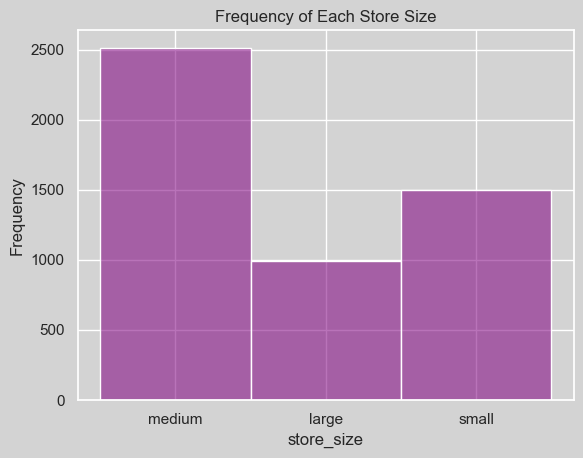

In [5]:
sns.histplot(df.store_size, color="Purple", alpha=0.55)
plt.title("Frequency of Each Store Size")
plt.ylabel("Frequency")

#### Proportion of days with promo and holiday

In [6]:
proportion = df.groupby(['promo', 'holiday']).count()['day_of_week'] / len(df)
label_map = {
    (0, 0): 'No Promo, No Holiday',
    (0, 1): 'No Promo, Holiday',
    (1, 0): 'Promo, No Holiday',
    (1, 1): 'Promo, Holiday'
}

new_index_labels = [label_map[combo] for combo in proportion.index]
proportion.index = new_index_labels
proportion

No Promo, No Holiday    0.6320
No Promo, Holiday       0.0668
Promo, No Holiday       0.2724
Promo, Holiday          0.0288
Name: day_of_week, dtype: float64

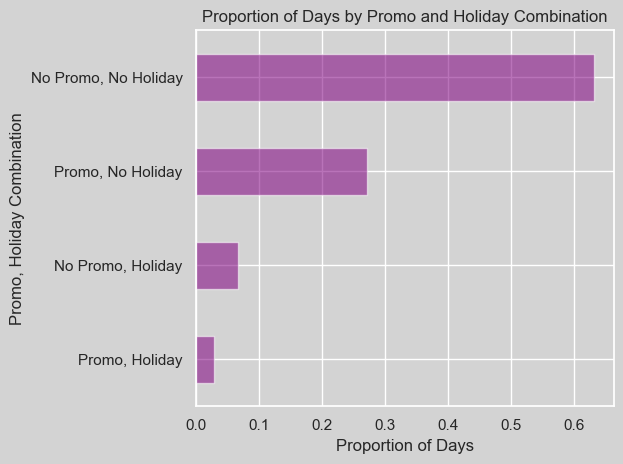

In [7]:
proportion.sort_values(ascending=True).plot(kind="barh", color="Purple", alpha=0.55)

plt.xlabel("Proportion of Days")
plt.ylabel("Promo, Holiday Combination")
plt.title("Proportion of Days by Promo and Holiday Combination")

plt.tight_layout()
plt.show()

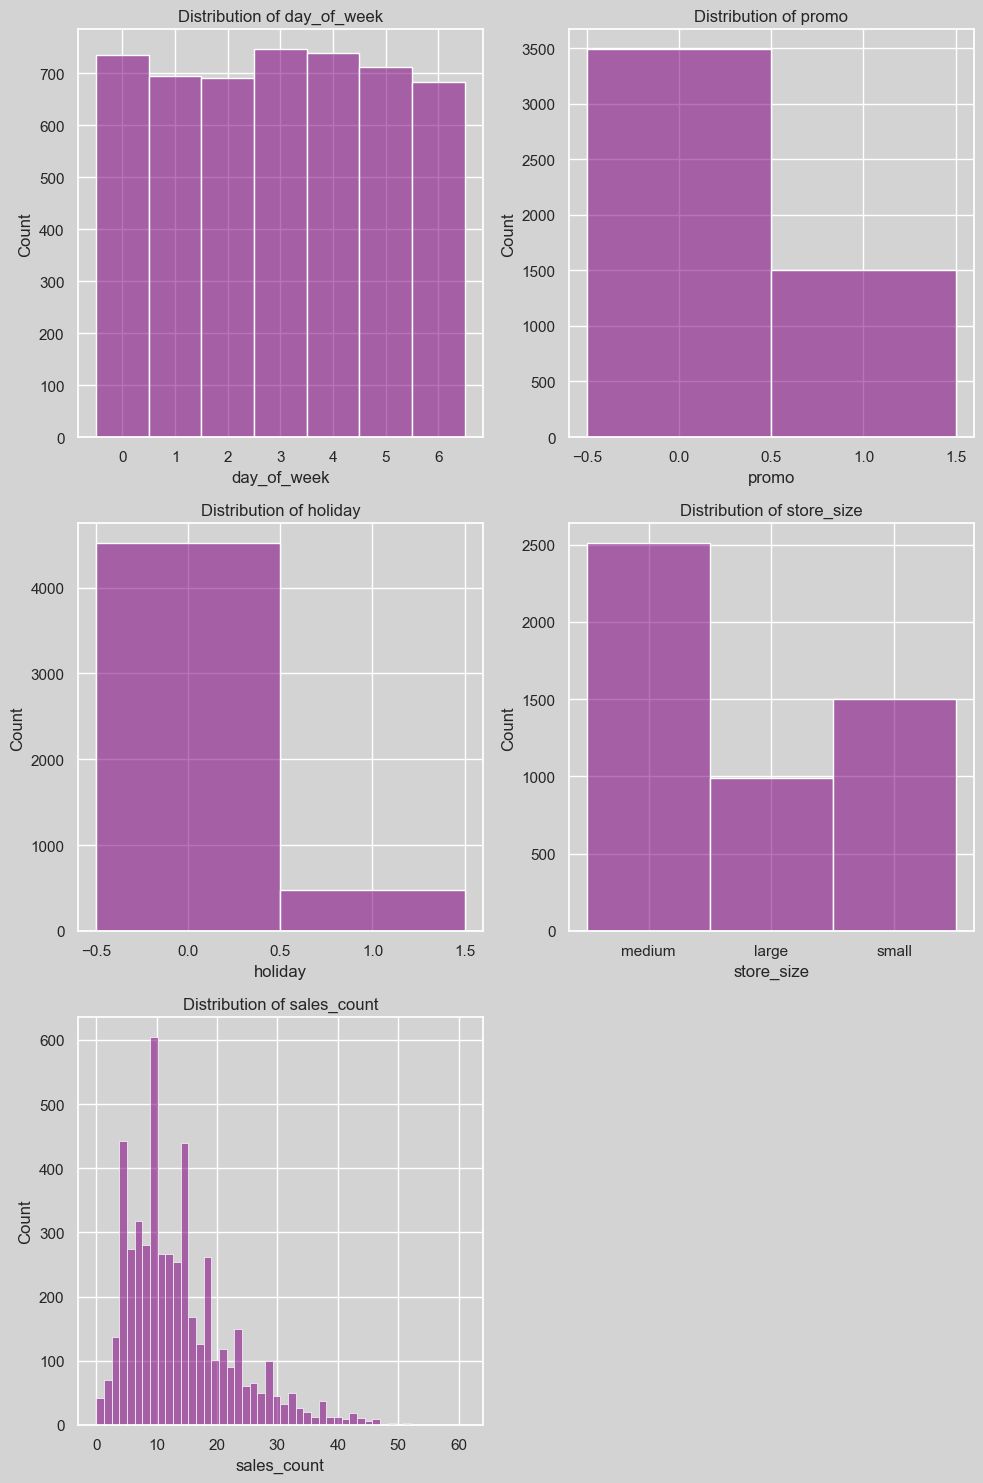

In [8]:
cols = df.columns

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,15))

axes = axes.flatten()

for ind, col in enumerate(cols):
    sns.histplot(
        df[col],
        ax=axes[ind],
        discrete=col != "sales_count",
        color="Purple",
        alpha=0.55
    )
    axes[ind].set_title(f"Distribution of {col}")

plt.delaxes(axes[-1])
plt.tight_layout()

<Axes: >

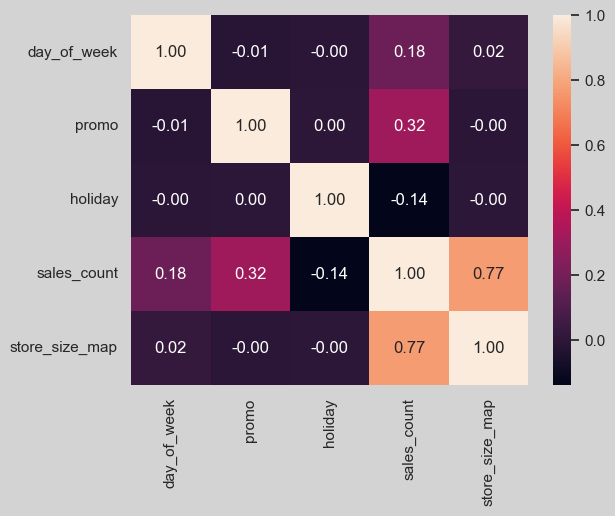

In [9]:
mapping = {
    "small" : 1,
    "medium" : 2,
    "large" : 3
}

df['store_size_map'] = df['store_size'].map(mapping)

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt = ".2f"
)

d:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='sales_count'>

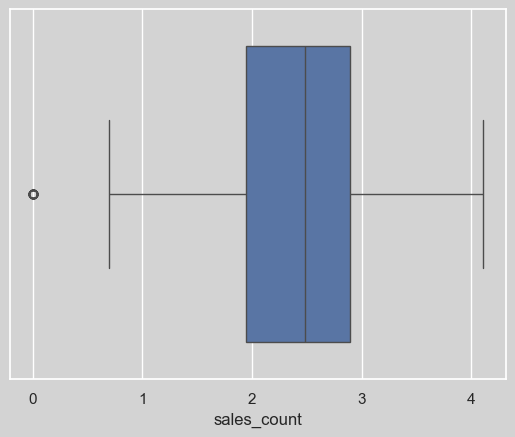

In [26]:
sns.boxplot(np.log(df['sales_count']), orient="h")

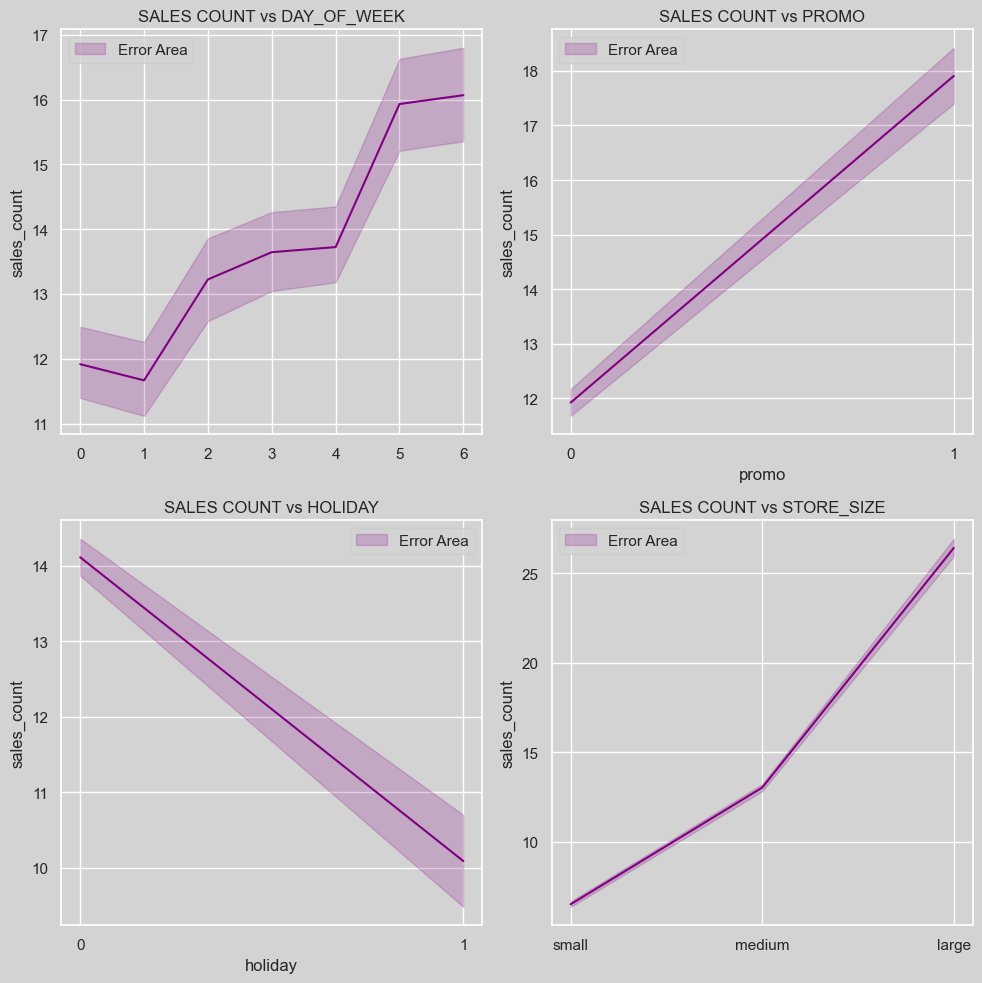

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
axes = axes.flatten()

for ind, col in enumerate(df.drop(columns=["sales_count", 'store_size_map']).columns):
    if col == "store_size":
        plot = pd.Categorical(df[col], categories=["small", "medium", "large"])
    elif col in ["promo", 'holiday']:
        plot = df[col].astype(str)
    else:
        plot=pd.Categorical(df[col], ordered=True)

    sns.lineplot(
        df, 
        x=plot,
        y=df['sales_count'],
        ax=axes[ind],
        color="purple",
        err_kws={"label": "Error Area"}
    )
    axes[ind].set_title(f"SALES COUNT vs {col.upper()}")

plt.legend()
plt.tight_layout()

### Step 2: Fit a Poisson Regression Model (30 points)

Fit a Poisson regression model with sales_count as the outcome.



In [51]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print("Train size:", df_train.shape)
print("Test size:", df_test.shape)

Train size: (4000, 6)
Test size: (1000, 6)


In [93]:
mean = df_test['sales_count'].mean()

baseline = abs(df_test['sales_count'] - mean).mean()

print("Baseline:", baseline)

Baseline: 6.480272000000001


In [84]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


formula = 'sales_count ~ ' + " + ".join(df_train.drop(columns=["sales_count", 'store_size']).columns)
model = smf.glm(formula=formula, data=df_train, family=sm.families.Poisson())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            sales_count   No. Observations:                 4000
Model:                            GLM   Df Residuals:                     3995
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10638.
Date:                Mon, 05 May 2025   Deviance:                       4169.9
Time:                        15:19:40   Pearson chi2:                 4.11e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9831
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9104      0.016     55.637      0.000       0.878       0.942
day_of_week        0.0502      0.002     23.444      0.000       0.046       0.054
promo              0.4144      0.009     47.728      0.000       0.397       0.431
holiday           -0.3370      0.017    -20.258      0.000      -0.370      -0.304
store_size_map     0.6950      0.006    111.585      0.000       0.683       0.707
==================================================================================
"""

In [85]:
overdispersion = model.deviance / model.df_resid

if overdispersion > 1.5:
    print(f"Overdispersion occurs\nvalue = {overdispersion}")
else:
    print(f"Overdispersion did not occur\nvalue = {overdispersion}")

Overdispersion did not occur
value = 1.0437758341923553


---
## Evaluation

In [95]:
y_pred = model.predict(df_test)
y_test = df_test['sales_count']
resid_test = y_test- y_pred

mae = abs(resid_test).mean()

print("Baseline:", baseline)
print("Mean abosolute error:", mae)

Baseline: 6.480272000000001
Mean abosolute error: 2.8154642638195444


In [102]:
sample = {
    "store_size_map" : 1,
    "day_of_week" : 0,
    "promo" : 1,
    "holiday" : 0
}

df_sample = pd.DataFrame([sample])
df_sample

,store_size_map,day_of_week,promo,holiday
0,1,0,1,0


In [103]:
model.predict(df_sample)

0    7.536278
dtype: float64

In [105]:
sample = {
    "store_size_map" : 2,
    "day_of_week" : 6,
    "promo" : 0,
    "holiday" : 0
}
df_sample = pd.DataFrame([sample])
df_sample

,store_size_map,day_of_week,promo,holiday
0,2,6,0,0


In [106]:
model.predict(df_sample)

0    13.483823
dtype: float64